In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
iris = sns.load_dataset('iris')

# data split
train_and_validate, test = train_test_split(iris, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = StandardScaler()
cols = ['petal_length', 'sepal_length', 'petal_width', 'sepal_width']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [3]:
X = train_scaled[['petal_length','sepal_length']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
kmeans.cluster_centers_

array([[ 0.76721355,  0.73652301],
       [-1.1747077 , -0.95825828],
       [ 0.33108459, -0.20780248],
       [ 1.47947637,  1.95407918]])

In [5]:
pd.DataFrame(kmeans.cluster_centers_,columns=X.columns)

,petal_length,sepal_length
0,0.767214,0.736523
1,-1.174708,-0.958258
2,0.331085,-0.207802
3,1.479476,1.954079


In [8]:
X.shape

(121, 2)

In [9]:
kmeans.labels_.shape

(121,)

In [10]:
train['cluster'] = kmeans.labels_
train

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sepal_length,sepal_width,petal_length,petal_width,species,cluster
41,4.5,2.3,1.3,0.3,setosa,1
142,5.8,2.7,5.1,1.9,virginica,2
82,5.8,2.7,3.9,1.2,versicolor,2
127,6.1,3.0,4.9,1.8,virginica,0
28,5.2,3.4,1.4,0.2,setosa,1
...,...,...,...,...,...,...
29,4.7,3.2,1.6,0.2,setosa,1
52,6.9,3.1,4.9,1.5,versicolor,0
1,4.9,3.0,1.4,0.2,setosa,1
57,4.9,2.4,3.3,1.0,versicolor,1


In [11]:
train.groupby('cluster').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster,,,,
0,6.444737,2.950000,5.047368,1.731579
1,5.039130,3.380435,1.582609,0.306522
2,5.661538,2.711538,4.269231,1.423077
3,7.454545,3.136364,6.318182,2.027273


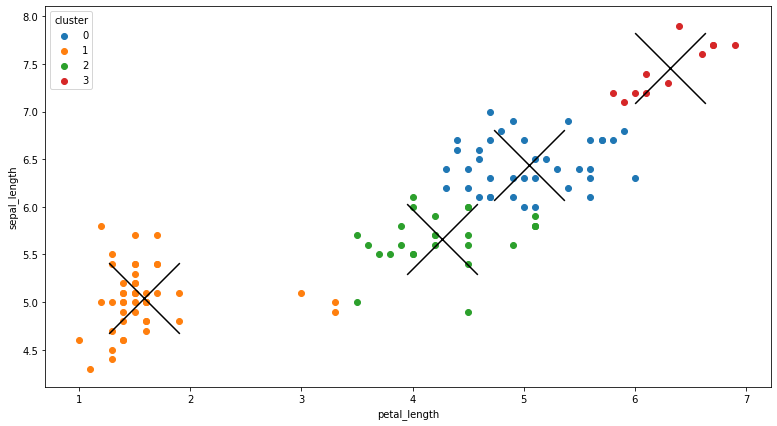

In [12]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in train.groupby('cluster'):
    ax.scatter(subset.petal_length, subset.sepal_length, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='sepal length', xlabel='petal length')

train.groupby('cluster').mean().plot.scatter(y='sepal_length', x='petal_length', marker='x', s=5000, ax=ax, c='black')

In [13]:
# sum of squared distances from each point to its cluster center
kmeans.inertia_

23.24898249975317

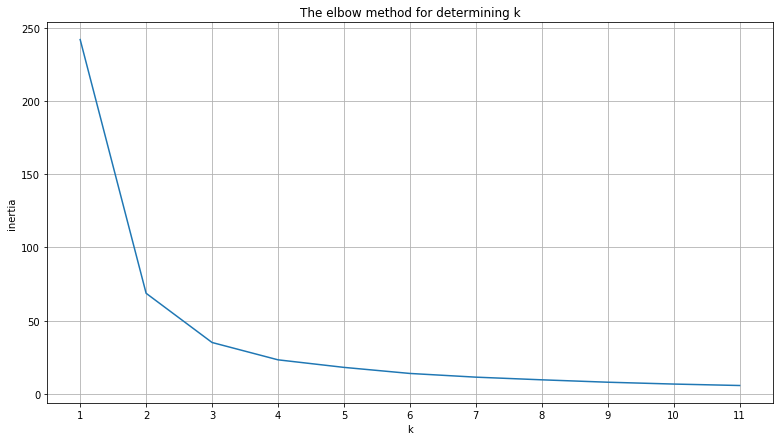

In [14]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

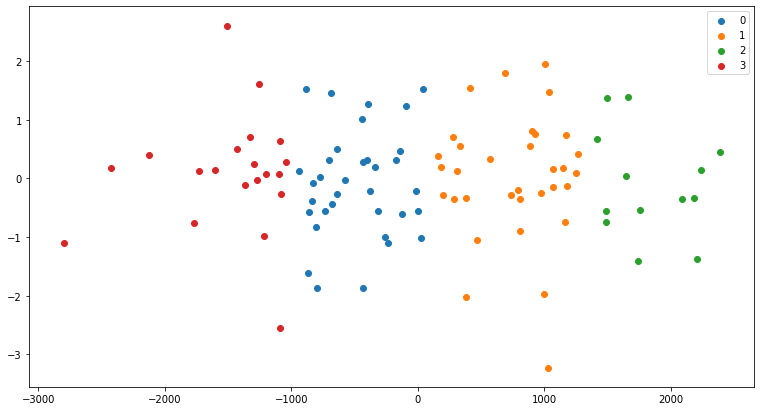

In [15]:
np.random.seed(123)

df = pd.DataFrame({
    'x': np.random.randn(100) * 1000,
    'y': np.random.randn(100),
})

kmeans = KMeans(n_clusters=4).fit(df)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(13, 7))
for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.x, subset.y, label=cluster)
plt.legend()

In [16]:
df = pd.read_csv('https://gist.githubusercontent.com/zgulde/ad9305acb30b00f768d4541a41f5ba19/raw/01f4ac8f158e68b0d293ff726c0c1dd08cdd501d/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [17]:
# data split
train_and_validate, test = train_test_split(df, test_size=.1, random_state=123)
train, validate = train_test_split(train_and_validate, test_size=.1, random_state=123)

# scale
scaler = StandardScaler()
cols = ['age', 'bmi', 'charges']
train_scaled = train.copy()
train_scaled[cols] = scaler.fit_transform(train[cols])

In [18]:
X = train_scaled[['age', 'bmi', 'children', 'smoker', 'charges']]
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
train['cluster'] = kmeans.labels_

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
pd.concat([
    train.groupby('cluster').mean(),
    train.groupby('cluster').size().rename('n_observations'),
], axis=1)

,age,sex,bmi,children,smoker,region,charges,n_observations
cluster,,,,,,,,
0,48.023810,0.547619,36.788810,0.476190,0.000000,1.452381,9169.871743,42
1,39.631579,0.447368,31.143092,2.644737,0.078947,1.500000,10878.666749,76
2,52.440000,0.460000,26.331600,0.420000,0.240000,1.340000,14918.686028,50
3,40.150000,0.725000,35.264625,1.100000,1.000000,1.625000,40941.054304,40
4,24.000000,0.506849,27.651918,0.410959,0.123288,1.561644,5244.147329,73
